In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud

from game.src.feature_generator import get_embedding, get_vector_list, get_top_twenty_words
from game.flaskapp_andrius.api import preprocesser

In [13]:
df_recipes = pd.read_csv('../data/recipe_table.csv', sep=';')

In [14]:
# Take features necessary for embedding calc
df_recipes['price'] = df_recipes['price_2p_pence']
df_clean = df_recipes[['id', 'food_group', 'calories', 'carbs', 'fat',
                      'protein', 'cooking_time', 'title', 'description',
                      'key_ingredient', 'price']]

recipe_dict = df_clean.to_dict(orient='records')
list_of_embeddings = get_embedding(recipe_dict)
df_clean['embedding'] = list_of_embeddings
df_clean.head(1)

,id,food_group,calories,carbs,fat,protein,cooking_time,title,description,key_ingredient,price,embedding
0,1,Beef,474,26,23,45,25,Seared beef with spring vegetable medley,We've paired a succulent seared steak with a m...,Grass-fed heritage breed Yorkshire beef,1400,0.039164


In [15]:
# Prepare vectors
list_of_vectors = get_vector_list(recipe_dict)
df_clean['vector'] = list_of_vectors
df_vector = pd.DataFrame(df_clean['vector'])
df_vector['embedding'] = df_clean['embedding']
df_vector.head(1)

,vector,embedding
0,"[0.0647217469599511, -0.003410175382256585, -0...",0.039164


In [16]:
df_vector['title'] = df_clean['title']
df_vector['description'] = df_clean['description']
df_vector['key_ingredient'] = df_clean['key_ingredient']
df_vector['comb'] = df_vector[['title', 'description', 'key_ingredient']].apply(lambda x: ' '.join(x), axis = 1)

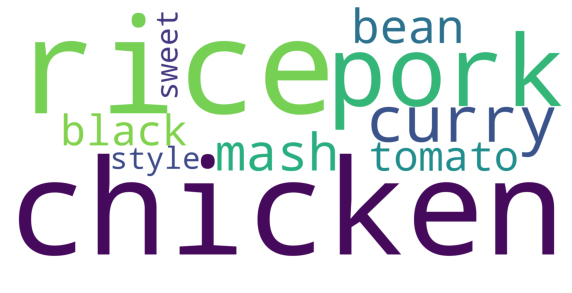

In [17]:
title_twenty = get_top_twenty_words(df_vector['title'], 10)
df_title_twenty = pd.DataFrame(title_twenty)
df_title_twenty
title_lists = df_title_twenty.index.values

plt.figure(figsize=(10,8))
wordcloud=WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(' '.join(title_lists))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

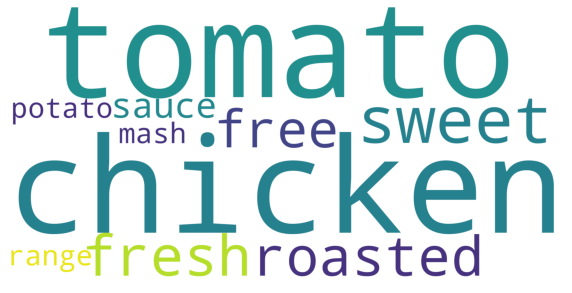

In [18]:
title_twenty = get_top_twenty_words(df_vector['description'], 10)
df_title_twenty = pd.DataFrame(title_twenty)
df_title_twenty
title_lists = df_title_twenty.index.values

plt.figure(figsize=(10,8))
wordcloud=WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(' '.join(title_lists))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

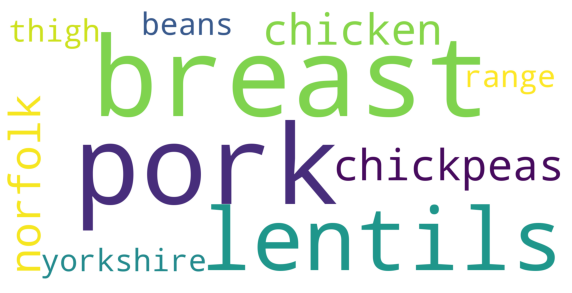

In [19]:
title_twenty = get_top_twenty_words(df_vector['key_ingredient'], 10)
df_title_twenty = pd.DataFrame(title_twenty)
df_title_twenty
title_lists = df_title_twenty.index.values

plt.figure(figsize=(10,8))
wordcloud=WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(' '.join(title_lists))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

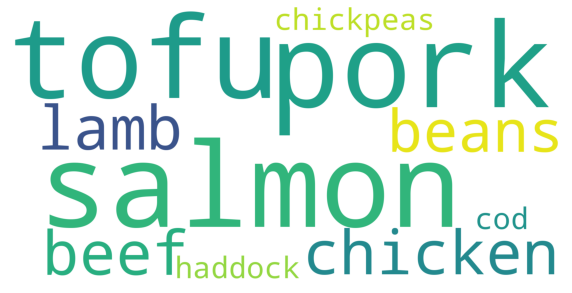

In [20]:
title_twenty = get_top_twenty_words(df_vector['comb'], 10)
df_title_twenty = pd.DataFrame(title_twenty)
df_title_twenty
title_lists = df_title_twenty.index.values

plt.figure(figsize=(10,8))
wordcloud=WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(' '.join(title_lists))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
# title goes from 0 to 9 (0-9)
# description goes from 0 to 9 (10-19)
# key ingredient 0-4 (20 to 24)
# combined 0-19 (25 to 44)